In [1]:
from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import time

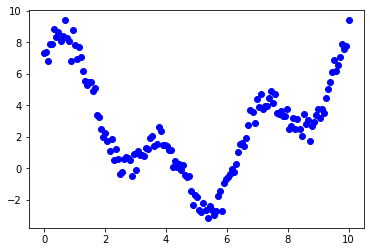

In [2]:
n = 150
X_data = np.linspace(0,10,n)
X_data = X_data.reshape((n,1))
Y_data = np.sin(X_data) + 2* np.sin(2 * X_data) + 0.3 * (X_data - 5)**2 
data_no_noise = np.concatenate((X_data, Y_data), axis=1)

Y_data += np.random.normal(0, 0.5, [n,1])

plt.plot(X_data, Y_data, 'bo')
plt.show()

In [3]:
data = np.concatenate((X_data, Y_data), axis=1)

np.random.shuffle(data)

data_tr, data_val, data_test = np.split(data, [int(0.8*n), int(0.8*n)+int(0.1*n)], axis = 0)
print(data_tr.shape, data_val.shape, data_test.shape)
n_tr, n_val, n_test = data_tr.shape[0], data_val.shape[0], data_test.shape[0]

(120, 2) (15, 2) (15, 2)


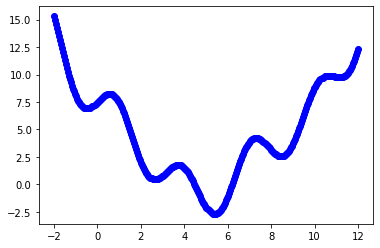

In [4]:
n_eval = 300
X_data = np.linspace(-2,12,n_eval)
X_data = X_data.reshape((n_eval,1))
Y_data = np.sin(X_data) + 2* np.sin(2 * X_data) + 0.3 * (X_data - 5)**2 

plt.plot(X_data, Y_data, 'bo')
plt.show()

data_eval = np.concatenate((X_data, Y_data), axis=1)


In [5]:
def next_batch(data_tr, i, batch_size):
    return data_tr[i*batch_size:(i+1)*batch_size-1, :]  

In [6]:
# Parameters
learning_rate = 0.02
num_epochs = 4000
batch_size = n_tr // 1
itpep = n_tr // batch_size
# display_step = 100
wd_par = 0.1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 1 
num_output = 1 

# tf Graph input
X = tf.placeholder(tf.float32, shape = [None, 1])
Y = tf.placeholder(tf.float32, shape = [None, 1])

In [7]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_output]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_output]))
}

In [8]:
# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    # Output fully connected layer 
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    return out_layer

In [9]:
fp = neural_net(X)
error = tf.reduce_sum(tf.pow(fp-Y, 2))

loss = n_tr / batch_size * tf.reduce_sum(tf.pow(fp-Y, 2)) \
                + wd_par * tf.reduce_sum([tf.reduce_sum(tf.pow(weights[i], 2)) for i in weights])

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()

W0909 12:35:29.153282 13000 deprecation.py:323] From C:\Users\afpsa\Anaconda3\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1375: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Optimization for learning rate 0.020000 finished!
Optimization for learning rate 0.020000 finished!
Optimization for learning rate 0.020000 finished!


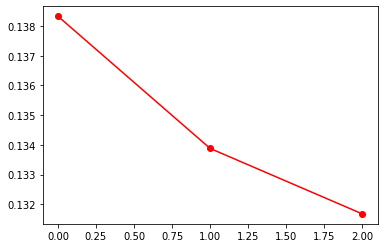

In [10]:
errors = []
opt_weights = []
opt_biases = []

init_weights = []
init_biases = []

sess = tf.Session()
for _ in range(3):
    
    #############################################################
    sess.run(init)
    
    init_weights.append(sess.run(weights))
    init_biases.append(sess.run(biases))
    #############################################################
    i = 0

    for iteration in range(num_epochs * itpep):

        data_batch = next_batch(data_tr, i, batch_size)
        sess.run(train_op, feed_dict={X: data_batch[:, [0]], Y: data_batch[:, [1]]})

        if (iteration + 1) % itpep == 0:
            i = 0
        else:
            i += 1
    print('Optimization for learning rate', '{:.6f}'.format(learning_rate), 'finished!')
    
    errors.append(sess.run(error, feed_dict={X: data_val[:, [0]], Y: data_val[:, [1]]}) / n_val)
    opt_weights.append(sess.run(weights))
    opt_biases.append(sess.run(biases))
    
plt.plot(errors, 'ro-')
plt.show()

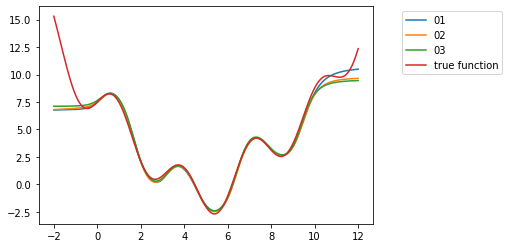

In [11]:
for c in range(len(opt_weights)):
    weights = opt_weights[c]
    biases = opt_biases[c]
    fp = neural_net(X)
    
    plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}), label = '%.2d' %(c+1))
    
plt.plot(data_eval[:, [0]], data_eval[:, [1]], label = 'true function')
plt.legend(bbox_to_anchor=(1.4, 1.0))
plt.show()

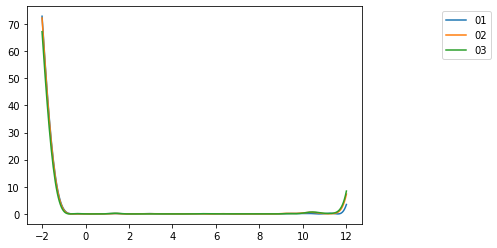

In [13]:
for c in range(len(opt_weights)):
    weights = opt_weights[c]
    biases = opt_biases[c]
    fp = neural_net(X)
    temp_error = sess.run(tf.pow(fp-Y, 2), feed_dict = {X: data_eval[:, [0]], Y: data_eval[:, [1]]})
    
    plt.plot(data_eval[:, [0]], temp_error, label = '%.2d' %(c+1))
    
# plt.plot(data_eval[:, [0]], data_eval[:, [1]], label = 'true function')
plt.legend(bbox_to_anchor=(1.4, 1.0))
plt.show()

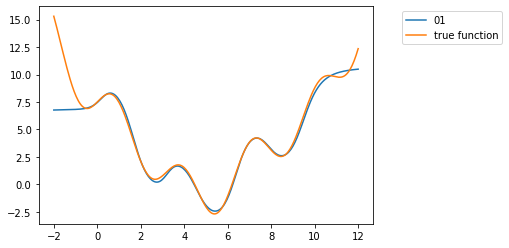

In [14]:
weights = opt_weights[0]
biases = opt_biases[0]
fp = neural_net(X)
    
plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}), label = '%.2d' %(0+1))
    
plt.plot(data_eval[:, [0]], data_eval[:, [1]], label = 'true function')
plt.legend(bbox_to_anchor=(1.4, 1.0))
plt.show()

In [18]:
import itertools
flatten = itertools.chain.from_iterable

def dictovec(a):
    avec = np.array(list(flatten([val.flatten() for val in a.values()])))
    return avec

def shapeslengths(a):
    return [val.shape for val in a.values()], [len(val.flatten()) for val in a.values()]

def vectodict(avec, keys, shapes, lengths):
    l = []
    k = 0
    for i, s in enumerate(shapes):
        l.append(avec[k:k+lengths[i]].reshape(s))
        k += lengths[i]
    a = dict(zip(keys, l))
    return a

def abtovec(a, b):
    return np.concatenate((dictovec(a), dictovec(b)))

def cvectodict(cvec, akeys, bkeys, sa, la, sb, lb):
    avec = cvec[:sum(la)]
    bvec = cvec[sum(la):]
    
    return vectodict(avec, list(akeys), sa, la), vectodict(bvec, list(bkeys), sb, lb)

In [19]:
sw, lw = shapeslengths(opt_weights[0])
sb, lb = shapeslengths(opt_biases[0])
wkeys = opt_weights[0].keys()
bkeys = opt_biases[0].keys()

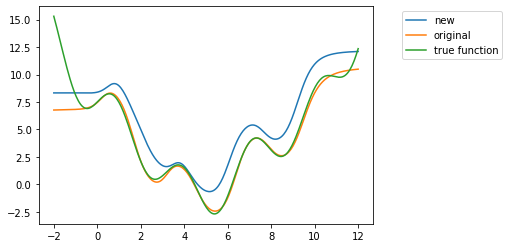

In [24]:
w1 = opt_weights[0]
b1 = opt_biases[0]

wb1vec = abtovec(w1, b1)

par = 0.01
wb1vec_new = wb1vec + par

weights, biases = cvectodict(wb1vec_new, wkeys, bkeys, sw, lw, sb, lb)

fp = neural_net(X)
plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}), label = 'new')

weights = opt_weights[0]
biases = opt_biases[0]
fp = neural_net(X)
plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}), label = 'original')
    
plt.plot(data_eval[:, [0]], data_eval[:, [1]], label = 'true function')
plt.legend(bbox_to_anchor=(1.4, 1.0))
plt.show()

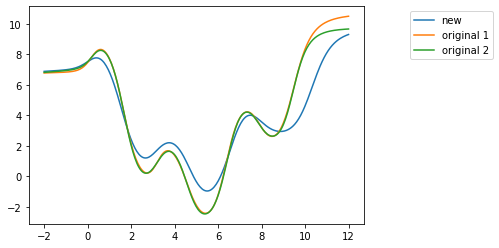

In [27]:
par = 0.1
w1 = opt_weights[0]
w2 = opt_weights[1]
b1 = opt_biases[0]
b2 = opt_biases[1]

wb1vec = abtovec(w1, b1)
wb2vec = abtovec(w2, b2)

wbvec_new = par * wb1vec + (1 - par) * wb2vec
weights, biases = cvectodict(wbvec_new, wkeys, bkeys, sw, lw, sb, lb)

fp = neural_net(X)
plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}), label = 'new')

weights = opt_weights[0]
biases = opt_biases[0]
fp = neural_net(X)
plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}), label = 'original 1')

weights = opt_weights[1]
biases = opt_biases[1]
fp = neural_net(X)
plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}), label = 'original 2')
    
plt.legend(bbox_to_anchor=(1.4, 1.0))
plt.show()


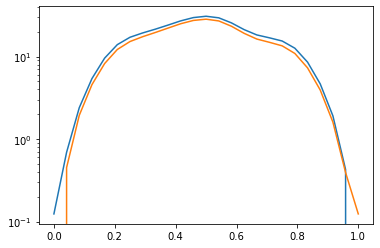

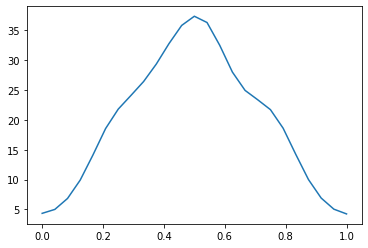

In [31]:
w1 = opt_weights[0]
b1 = opt_biases[0]

w2 = opt_weights[1]
b2 = opt_biases[1]
#########################################################################################################################
wb1vec = abtovec(w1, b1)
wb2vec = abtovec(w2, b2)

weights = w1
biases = b1
fp = neural_net(X)
pred_1 = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})

weights = w2
biases = b2
fp = neural_net(X)
pred_2 = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})

error_1 = []
error_2 = []
error_line = []

pars = np.linspace(0, 1, 25)

for par in pars:
    wbvec_new = par * wb1vec + (1 - par) * wb2vec
    weights, biases = cvectodict(wbvec_new, wkeys, bkeys, sw, lw, sb, lb)

    fp = neural_net(X)
    error = tf.reduce_sum(tf.pow(fp-Y, 2))
    
    pred = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})
    
    error_1.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: pred_1}) / n)
    error_2.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: pred_2}) / n)
    
    error_line.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: data_eval[:, [1]]}) / n)

plt.yscale('log')
plt.plot(pars, error_1)
plt.plot(pars, error_2)
plt.show()

plt.plot(pars, error_line)
plt.show()

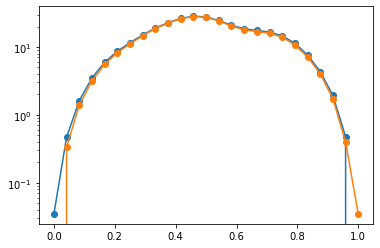

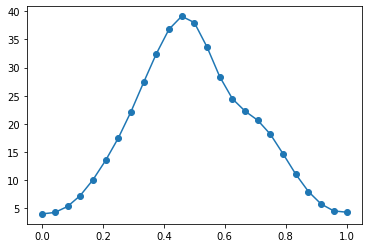

In [70]:
w1 = opt_weights[1]
b1 = opt_biases[1]

w2 = opt_weights[2]
b2 = opt_biases[2]
#########################################################################################################################
wb1vec = abtovec(w1, b1)
wb2vec = abtovec(w2, b2)

weights = w1
biases = b1
fp = neural_net(X)
pred_1 = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})

weights = w2
biases = b2
fp = neural_net(X)
pred_2 = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})

error_1 = []
error_2 = []
error_line = []

pars = np.linspace(0, 1, 25)

for par in pars:
    wbvec_new = par * wb1vec + (1 - par) * wb2vec
    weights, biases = cvectodict(wbvec_new, wkeys, bkeys, sw, lw, sb, lb)

    fp = neural_net(X)
    error = tf.reduce_sum(tf.pow(fp-Y, 2))
    
    pred = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})
    
    error_1.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: pred_1}) / n)
    error_2.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: pred_2}) / n)
    
    error_line.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: data_eval[:, [1]]}) / n)

plt.yscale('log')
plt.plot(pars, error_1, '-o')
plt.plot(pars, error_2, '-o')
plt.show()

plt.plot(pars, error_line, '-o')
plt.show()

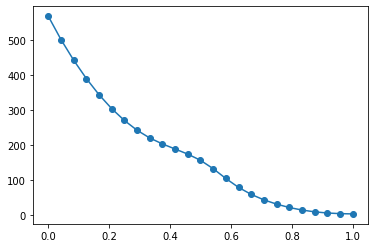

In [72]:
w1 = opt_weights[0]
b1 = opt_biases[0]

w2 = init_weights[0]
b2 = init_biases[0]
#########################################################################################################################
wb1vec = abtovec(w1, b1)
wb2vec = abtovec(w2, b2)

weights = w1
biases = b1
fp = neural_net(X)
pred_1 = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})

weights = w2
biases = b2
fp = neural_net(X)
pred_2 = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})

error_1 = []
error_2 = []
error_line = []

pars = np.linspace(0, 1, 25)

for par in pars:
    wbvec_new = par * wb1vec + (1 - par) * wb2vec
    weights, biases = cvectodict(wbvec_new, wkeys, bkeys, sw, lw, sb, lb)

    fp = neural_net(X)
    error = tf.reduce_sum(tf.pow(fp-Y, 2))
    
    pred = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})
    
    error_1.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: pred_1}) / n)
    error_2.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: pred_2}) / n)
    
    error_line.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: data_eval[:, [1]]}) / n)

plt.plot(pars, error_line, '-o')
plt.show()

In [44]:
w1 = opt_weights[0]
b1 = opt_biases[0]

w2 = opt_weights[1]
b2 = opt_biases[1]

wb1vec = abtovec(w1, b1)
wb2vec = abtovec(w2, b2)

uvec = wb2vec - wb1vec
u_sq = sum([x**2 for x in uvec])
u_norm = np.sqrt(u_sq)

u_hat_vec = uvec / u_norm
u_hat_w, u_hat_b = cvectodict(u_hat_vec, wkeys, bkeys, sw, lw, sb, lb)

In [45]:
w3 = opt_weights[2]
b3 = opt_biases[2]

wb3vec = abtovec(w3, b3)

w3mw1vec = wb3vec - wb1vec

inner = sum([x * y for x, y in zip(uvec, w3mw1vec)])

vvec = w3mw1vec - inner / u_sq * uvec
v_sq = sum([x**2 for x in vvec])
v_norm = np.sqrt(v_sq)

v_hat_vec = vvec / v_norm
v_hat_w, v_hat_b = cvectodict(v_hat_vec, wkeys, bkeys, sw, lw, sb, lb)

In [60]:
n1 = np.linspace(0, 1, 6)
n2 = np.linspace(0, 100, 6)

n1v, n2v = np.meshgrid(n1, n2)

print(n1v)
print(n2v)

Z = []
for i in n1:
    Z_i = []
    for j in n2:
        Z_i.append(j)
    Z.append(Z_i)
print(np.array(Z).transpose())

[[0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]]
[[  0.   0.   0.   0.   0.   0.]
 [ 20.  20.  20.  20.  20.  20.]
 [ 40.  40.  40.  40.  40.  40.]
 [ 60.  60.  60.  60.  60.  60.]
 [ 80.  80.  80.  80.  80.  80.]
 [100. 100. 100. 100. 100. 100.]]
[[  0.   0.   0.   0.   0.   0.]
 [ 20.  20.  20.  20.  20.  20.]
 [ 40.  40.  40.  40.  40.  40.]
 [ 60.  60.  60.  60.  60.  60.]
 [ 80.  80.  80.  80.  80.  80.]
 [100. 100. 100. 100. 100. 100.]]


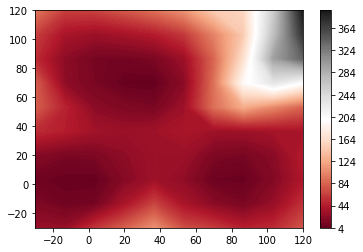

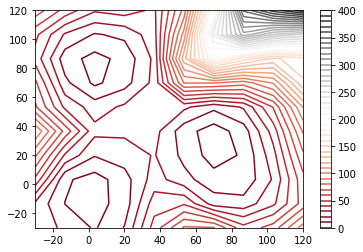

In [67]:
pars = np.linspace(-30, 120, 10)

error_mat = []

for par_1 in pars:
    error_v = []
    for par_2 in pars:
        
        wbvec_new = wb1vec + par_1 * u_hat_vec + par_2 * v_hat_vec
        weights, biases = cvectodict(wbvec_new, wkeys, bkeys, sw, lw, sb, lb)
        
        fp = neural_net(X)
        error = tf.reduce_sum(tf.pow(fp-Y, 2))
        
        error_v.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: data_eval[:, [1]]}) / n)

    error_mat.append(error_v)  
                
xx, yy = np.meshgrid(pars, pars)

plt.contourf(xx, yy, np.array(error_mat).transpose(), 200, origin='lower', cmap='RdGy')
plt.colorbar()
plt.show()

plt.contour(xx, yy, error_mat, 40, origin='lower', cmap='RdGy')
plt.colorbar()
plt.show()

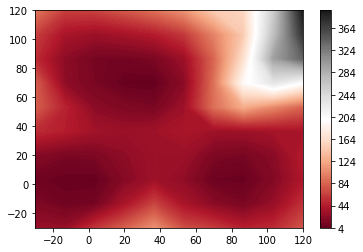

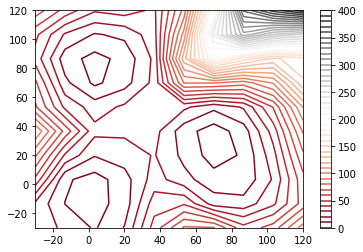

In [68]:
plt.contourf(xx, yy, np.array(error_mat).transpose(), 200, origin='lower', cmap='RdGy')
plt.colorbar()
plt.show()

plt.contour(xx, yy, error_mat, 40, origin='lower', cmap='RdGy')
plt.colorbar()
plt.show()